## Making a handwritten digit classifier using Tensorflow ##

#### Imports ####

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
import seaborn as sns

##### feed an image instance to the nueral net and then have 10 output  neurons which can classify it into one of 0-9 digits based on their scores, 0-1 because of sigmoid , an image can be represented as a 2d array of 0-256 values and then flatten it, this array size will have neurons equal to its size

In [2]:
(x_train, y_train), (x_test, y_test) =keras.datasets.mnist.load_data()

In [3]:
print(f"Number of training samples: {len(x_train)}")
print(f"Number of test samples: {len(x_test)}")

Number of training samples: 60000
Number of test samples: 10000


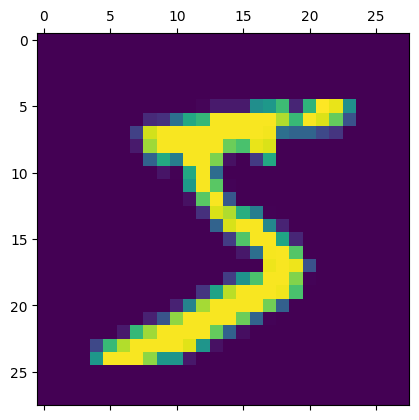

5


In [4]:
plt.matshow(x_train[0])
plt.show()
print(y_train[0])

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# reshaping it
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [7]:
scaled_x_train= x_train_flatten / 255
scaled_x_test = x_test_flatten /255

In [8]:
x_train_flatten.shape

(60000, 784)

In [9]:
x_test_flatten.shape

(10000, 784)

making the neural net using keras sequential, this will make sure that the neural net is layered and we will init it as follows

In [10]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape= (784,),activation = "sigmoid")
])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-12-27 17:58:43.340657: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-27 17:58:43.341201: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.compile(optimizer="adam", loss= 'sparse_categorical_crossentropy', metrics =["accuracy"])


In [12]:
model.fit(x_train_flatten, y_train, epochs=5)

2022-12-27 17:58:43.571510: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2022-12-27 17:58:43.752113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 9.3912 - accuracy: 0.8429
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 6.1381 - accuracy: 0.8792
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.7237 - accuracy: 0.8833
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.5687 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.3294 - accuracy: 0.8879


this has given a 88.75% accuracy but this isnt good enough so we need to find a fix, one way to do this is by using feature scaling, lets scale our arrays which range from 0-255 and scale them down to 0-1 

In [13]:
# using the scaled values 
model.fit(scaled_x_train, y_train, epochs=5)

Epoch 1/5
  43/1875 [..............................] - ETA: 6s - loss: 1.5959 - accuracy: 0.5327

2022-12-27 17:59:19.807421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 1.3037 - accuracy: 0.8217
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8999 - accuracy: 0.8694
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6183 - accuracy: 0.8845
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4513 - accuracy: 0.8962
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3601 - accuracy: 0.9062


running on test set

In [14]:
model.evaluate(scaled_x_test, y_test)

 27/313 [=>............................] - ETA: 1s - loss: 0.3404 - accuracy: 0.8993

2022-12-27 17:59:55.856512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.3194 - accuracy: 0.9158


[0.3193792998790741, 0.9158000349998474]

shows an accuracy of 91.4% on the test set

In [15]:
final_predictions= model.predict(scaled_x_test)

130/313 [===========>..................] - ETA: 0s

2022-12-27 17:59:57.146067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


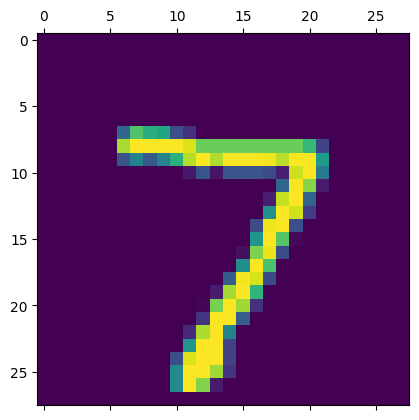

In [16]:
plt.matshow(x_test[0])

In [17]:
print(np.argmax(final_predictions[0]))

7


In [18]:
# making an array of final predictions
y_predicted_labels = [np.argmax(i) for i in final_predictions]

making a confusion matrix

In [21]:
conf_m= tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)

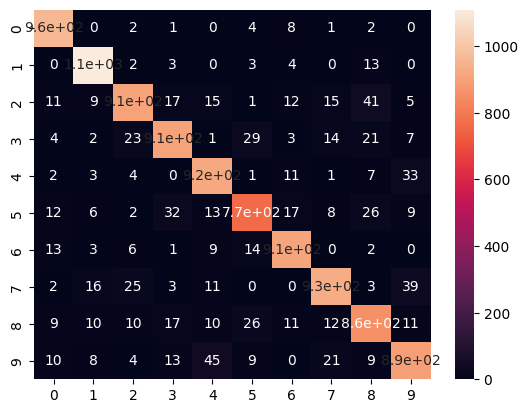

In [23]:
sns.heatmap(conf_m, annot=True)
plt.show()

## adding a hidden layer in the neural net ##

In [25]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape= (784,),activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])
model.compile(optimizer="adam", loss= 'sparse_categorical_crossentropy', metrics =["accuracy"])
model.fit(x_train_flatten, y_train, epochs=5)


Epoch 1/5
  10/1875 [..............................] - ETA: 11s - loss: 73.5554 - accuracy: 0.2562  

2022-12-27 18:10:16.247377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 2.2520 - accuracy: 0.8209
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3936 - accuracy: 0.8985
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2942 - accuracy: 0.9223
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2571 - accuracy: 0.9308
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2411 - accuracy: 0.9360


In [27]:
model.evaluate(x_test_flatten, y_test)

 26/313 [=>............................] - ETA: 1s - loss: 0.2441 - accuracy: 0.9375

2022-12-27 18:12:09.394944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.2870 - accuracy: 0.9346


[0.28698474168777466, 0.9346000552177429]

### Accuracy of 93% with one additon hidden layer of 100 neurons ###